In [1]:
# Set local python and nltk paths
import sys
sys.path.insert(0,'/vol/medic02/users/ag6516/miniconda/envs/TheanoLasagne/lib/python2.7/site-packages')
sys.path.insert(0,'/vol/medic02/users/ag6516/miniconda/envs/TheanoLasagne/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg')
sys.path.insert(0,'/vol/medic02/users/ag6516/miniconda/envs/TheanoLasagne/lib/python2.7/site-packages/IPython/extensions')

In [2]:
%matplotlib inline

import os
import nibabel as nib
from nibabel.testing import data_path
from skimage.transform import resize

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pickle

from random import randint
random.seed(123)
np.random.seed(123)

/vol/medic02/users/ag6516/miniconda/envs/TheanoLasagne/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
dir = ('/vol/medic02/users/ag6516/brain_ct/data/images/')
sample_exams = pickle.load(open('sample_exams_train_test_split.pkl'))

In [4]:
n_images = []
dims = []
min_max = []
for exam in sample_exams:
    n_im = nib.load(dir + 'rs_NII_DWIB1000/' + exam['mr imid'])
    data = n_im.get_data()
    dims.append(data.shape)
    n_images.append(n_im)
    min_max.append((min(data.flatten()), max(data.flatten())))
    n_im.uncache()

In [5]:
min_max = np.array(min_max)
MIN = min(min_max.flatten())
MAX = max(min_max.flatten())
print MAX,MIN

5261 0


In [6]:
#print dims[3]
#print n_images[3].header

In [7]:
hs = [h for h, _, _ in dims]
ws = [w for _, w, _ in dims]
ss = [s for _, _, s in dims]

print min(hs), min(ws), min(ss)
print max(hs), max(ws), max(ss)
print np.mean(ss), np.std(ss)

128 128 7
128 128 52
22.0993208829 2.6198568269


In [8]:
print sorted(set(hs))
print sorted(set(ws))
print sorted(set(ss))

[128]
[128]
[7, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 40, 52]


<type 'numpy.int16'>
624 0
0.999999999767 0.0
5261.0 0.0
[ 0  0  0  0  0  0  8 63 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
(128, 128, 25)


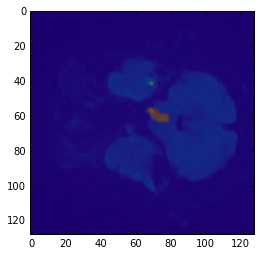

In [32]:
%matplotlib inline
#sample_exam = random.sample(sample_exams,1)[0]
#sample_exam = sample_exams[16]
#print sample_exam['patient id']

n_im = nib.load(dir + 'rs_NII_DWIB1000/' + 'PBENv2-0395_MR_ep2d_diff_3scan_trace_20160401(113056)_Vol3of3.nii.gz')
data = n_im.get_data()
print type(data[0,0,0])
print max(data.flatten()), min(data.flatten())
n_seg = nib.load(dir + 'LesionSeg_NII_DWIB1000/' + 'PBENv2-0395_MR_ep2d_diff_3scan_trace_20160401(113056)_Vol3of3.nii.gz')
print max(n_seg.get_data().flatten()), min(n_seg.get_data().flatten())
data_ss = n_seg.get_data()
data_s = data_ss.astype(np.float32)
old_min = min(data_s.flatten())
old_max = max(data_s.flatten())
data_s_norm = (data_s-old_min)*(MAX-MIN)/(old_max-old_min)+MIN
print max(data_s_norm.flatten()), min(data_s_norm.flatten())
h,w,l = data_s.shape

scores = [(n_seg.get_data()[:,:,n]>0.5).sum() for n in range(l)]
scores = np.array(scores)
print scores
indices = scores.argsort()[-7:][::-1]

print data.shape
#print sample_exam['mr report']
plt.imshow(data[:,:,indices[0]], cmap='viridis')
#plt.show()

#data_up = resize(data, (224, 224,l),  preserve_range=True)
#plt.imshow(data_up[:,:,indices[0]])
#plt.show()

#plt.imshow(data_s_norm[:,:,indices[0]])
#plt.show()

mask = data_s
mask[mask > 0.5] = 1
mask[mask <= 0.5] = 0
plt.imshow(mask[:,:,indices[0]], alpha=0.6)
#plt.show()


In [ ]:
%matplotlib inline
plt.figure()
plt.imshow(data[:,:,indices[6]])
plt.axis('off')
plt.figure()
plt.imshow(data[:,:,indices[0]])
plt.axis('off')
plt.figure()
plt.imshow(data[:,:,indices[6]])
plt.show()
plt.axis('off')

In [ ]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    plt.title(ax.index)
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])
    plt.title(ax.index)

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    plt.title(ax.index)

In [ ]:
%matplotlib notebook
%matplotlib notebook

print max(data_s.flatten()), min(data_s.flatten())
# sample_image = nib.load(dir+'PBENv2-0245_MR_ep2d_diff_3scan_trace_20151014(162826)_Vol3of3.nii')
multi_slice_viewer(data_s.T)